In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from typing import List

In [2]:
import matplotlib

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
save_plots = True
show_titles = False
black_and_white = True

In [4]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'B_studies_on_parsed_logs/'
                  + 'event_topological_exploration/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

In [5]:
io_folder = '/scratch/user/adegenna/top50_debug_only/'
input_file = io_folder + 'davinci_parsed_log_truthmatched.h5'

In [6]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3142.56,3145.09,17.4188,-213.8120,-214.0240,73162.60,73220.90,73279.20,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9031.32,9376.81,43.3318,32.6465,34.2547,31859.40,33076.10,34339.40,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-28860.80,-28879.30,787.3740,-28372.3000,-28391.8000,1099220.00,1099920.00,1100620.00,4,0.000041
3,0.605380,-0.202738,22.149234,-187.066928,17.364279,3467.294482,0.6057,-0.2032,22.1485,-2559.069617,...,26939.30,26960.10,90.1864,5198.5100,5202.8900,669476.00,669988.00,670499.00,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-13094.40,-13105.40,201.6090,6041.5000,6048.1100,340592.00,340879.00,341166.00,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,0.893651,-0.241412,-8.355713,-125.966633,-256.004059,4922.386341,0.8932,-0.2407,-8.3660,-822.995268,...,-3460.50,-4057.95,26.0127,-318.8400,-374.3880,5589.84,6552.96,7682.67,50285,0.000036
6497,3.966071,-2.533509,19.089908,951.244904,-401.923404,4663.160501,3.9666,-2.5339,19.0920,6062.898847,...,11824.60,11897.10,1431.6900,-15274.0000,-15371.8000,168929.00,169961.00,171000.00,50292,0.000032
6498,0.421768,-0.947067,-73.637508,-192.066143,-297.004409,4468.714184,0.4218,-0.9471,-73.6377,-2005.253008,...,44215.30,44303.10,4699.9900,-79816.6000,-79987.3000,1418820.00,1421630.00,1424450.00,50321,0.000037
6499,0.950653,-0.221805,-6.273085,115.579259,44.852030,5494.442486,0.9512,-0.2219,-6.2745,1036.018343,...,8858.18,8880.50,16.3900,-294.3940,-295.1690,121761.00,122067.00,122373.00,50323,0.000034


# Exploration of event topologies

In [7]:
coord_to_vector_comp = {
    'x': 0,
    'y': 1,
    'z': 2
}

In [8]:
coord_to_boundaries = {
    'x': (-2000,2000),
    'y': (-2000,2000),
    'z': (0,9000)
}

In [9]:
def plot_event_plane(
    df: pd.DataFrame,
    event_index: int,
    x_axis: str,
    y_axis: str,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    sort_by_x_axis_comp: bool = False,
    save_this_plot: bool = False
) -> None:
    
    fig = plt.figure()
    ax = plt.axes()
    
    #event = df.iloc[event_index]
    event = df.loc[event_index, :]
    
    x_comp = coord_to_vector_comp[x_axis]
    y_comp = coord_to_vector_comp[y_axis]
    
    ## Note: initial values are broken down in single columns (1 per component).
    ## Iteration values are not (atm). Hence two different techniques.
    vertices = []
    vertices.append([
        event[f'seed_vtx_{x_axis.upper()}'],
        event[f'seed_vtx_{y_axis.upper()}']
    ])
    vertices += [[vtx[x_comp], vtx[y_comp]] for vtx in event['iter_currentVertices']]
    
    p_refpoints = []
    p_refpoints.append([
        event[f'p_refPoint_{x_axis.upper()}'],
        event[f'p_refPoint_{y_axis.upper()}']
    ])
    p_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_p_refPoint']]
    
    pim_refpoints = []
    pim_refpoints.append([
        event[f'pim_refPoint_{x_axis.upper()}'],
        event[f'pim_refPoint_{y_axis.upper()}']
    ])
    pim_refpoints += [[refPoint[x_comp], refPoint[y_comp]] for refPoint in event['iter_pim_refPoint']]
    
    if sort_by_x_axis_comp:
        #vertices.sort()
        
        ## Get indices (a.k.a. iteration number) after sorting for fakesies
        #iteration_plot_order = [b[0] for b in sorted(enumerate(p_refpoints), key=lambda i:i[1])]
        ## Now sort for realsies
        p_refpoints.sort()
        pim_refpoints.sort()
        
        ## The following assumes the x component of p_refPoints and pim_refPoints is the same
        ## It will only make sense in zy and zx plots, since z components are shared because
        ## of how transportation is performed. This being said: this entire mode has been
        ## added with those planes in mind.
        #for iteration, refPoint in zip(iteration_plot_order, p_refpoints):
        #    ax.axvline(refPoint[0], color='grey', linestyle='dotted')
    
    #ax.plot(*zip(*vertices), color='black', marker='x', linestyle='--', label='Vertex')
    #ax.plot(*zip(*p_refpoints), color='tab:red', marker='x', linestyle='-', label='Proton')
    #ax.plot(*zip(*pim_refpoints), color='tab:blue', marker='x', linestyle='-', label='Pion')
    
    if black_and_white:
        proton_color = 'black'
        proton_line = '-'
        pion_color = 'black'
        pion_line = '--'
        vertex_color = 'black'
        vertex_line = 'dotted'
        true_vertex_color = 'black'
    else:
        proton_color = 'tab:red'
        proton_line = '-'
        pion_color = 'tab:blue'
        pion_line = '-'
        vertex_color = 'black'
        vertex_line = 'dotted'
        true_vertex_color = 'tab:green'
    
    ax.plot(*zip(*vertices), color=vertex_color, marker='x', linestyle=vertex_line, label='Vertex')
    ax.plot(*zip(*p_refpoints), color=proton_color, marker='', linestyle=proton_line, label='Proton')
    ax.plot(*zip(*pim_refpoints), color=pion_color, marker='', linestyle=pion_line, label='Pion')
        
    if show_true_vertex:
        mew = 1.5
        
        true_L_endvertex = [
            event[f'MCTRUTH_L_ENDVERTEX_{x_axis.upper()}'],
            event[f'MCTRUTH_L_ENDVERTEX_{y_axis.upper()}']
        ]
        
        ax.plot(
            *true_L_endvertex,
            color=true_vertex_color,
            label='True vertex',
            marker='+',
            markersize=10,
            mew=mew,
            linestyle=''
        )
        
        ax.plot(
            *true_L_endvertex,
            color=true_vertex_color,
            marker='+',
            markersize=100,
            mew=mew,
            linestyle=''
        )
        
    ax.set_xlabel(x_axis + " [mm]")
    ax.set_ylabel(y_axis + " [mm]")
    ax.grid()
    
    if show_titles:
        ax.set_title(f"Event {str(event_index)} ({event['status']})\n${x_axis}{y_axis}$ plane topology")
    
    if not tight_axes:
        ax.set_xlim(coord_to_boundaries[x_axis])
        ax.set_ylim(coord_to_boundaries[y_axis])
        
    ax.legend(loc='best', frameon=False)
    
    if save_plots and save_this_plot:
        file_name = f'evt_{str(event_index)}_{x_axis}{y_axis}'
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches='tight')
        plt.savefig(plot_directory + file_name + '.png', bbox_inches='tight', dpi=150)
    
    plt.show()

In [10]:
def plot_all_event_planes(
    df: pd.DataFrame,
    event_index: int,
    tight_axes: bool = False,
    show_true_vertex: bool = True,
    save_this_plot: bool = False
) -> None:
    
    common_arguments = {
        'tight_axes': tight_axes,
        'show_true_vertex': show_true_vertex,
        'save_this_plot': save_this_plot
    }
    
    plot_event_plane(df, event_index, 'x', 'y', sort_by_x_axis_comp=False, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'x', sort_by_x_axis_comp=True, **common_arguments)
    plot_event_plane(df, event_index, 'z', 'y', sort_by_x_axis_comp=True, **common_arguments)
    
    #PlotEvent3DPlane(index, interactive=False, tightAxes=tightAxes, showArrows=showArrows)

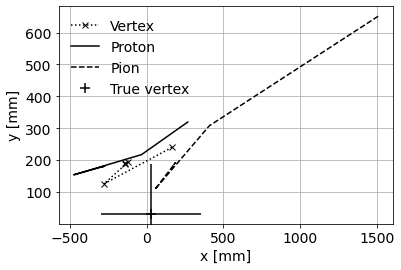

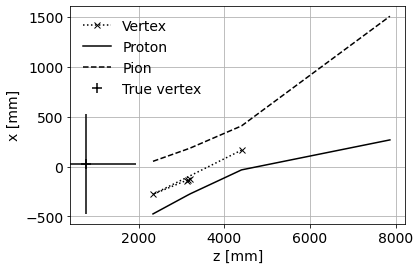

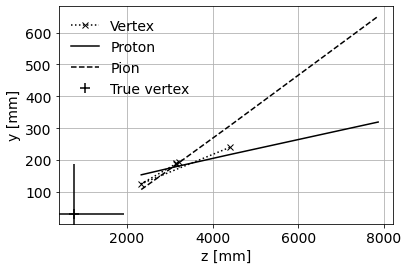

In [11]:
plot_all_event_planes(df_events, 6, tight_axes=True, show_true_vertex=True, save_this_plot=True)

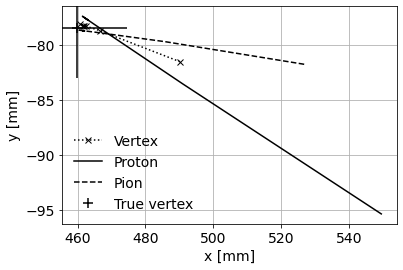

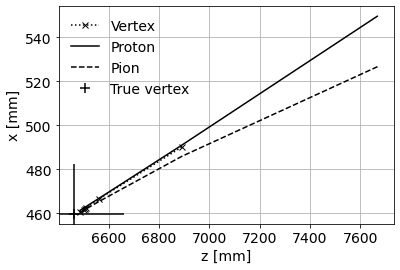

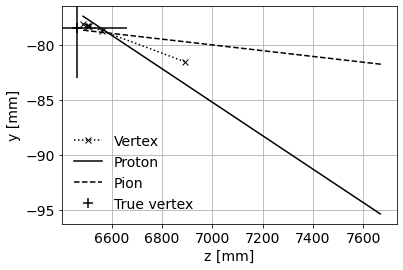

In [12]:
plot_all_event_planes(df_events, 0, tight_axes=True, show_true_vertex=True, save_this_plot=True)

In [13]:
list_of_good_nonconv_events = [3, 83, 109]

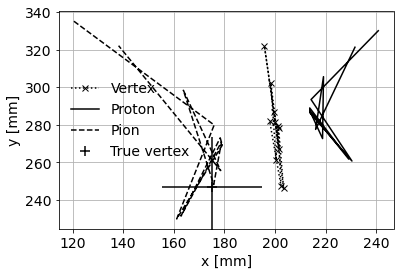

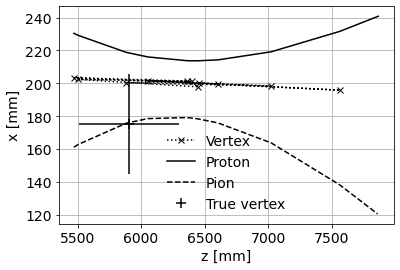

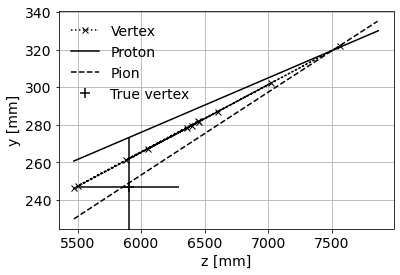

In [14]:
plot_all_event_planes(df_events, 83, tight_axes=True, show_true_vertex=True, save_this_plot=True)

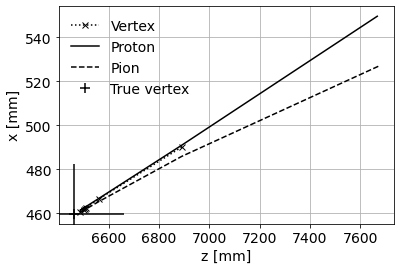

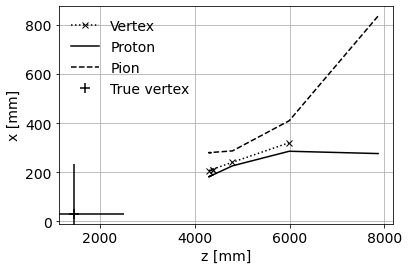

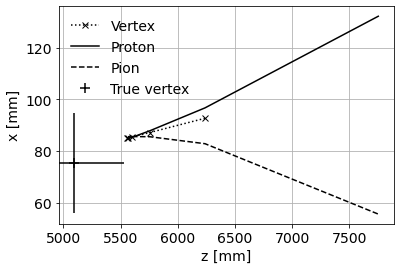

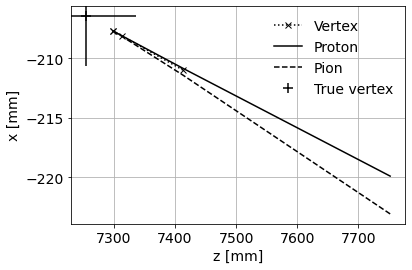

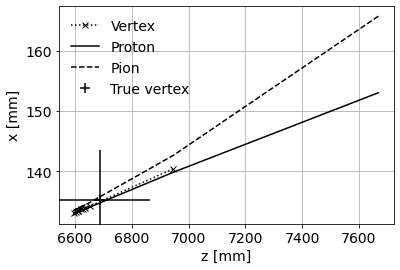

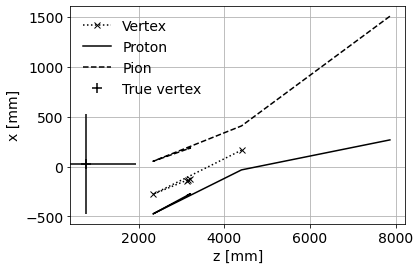

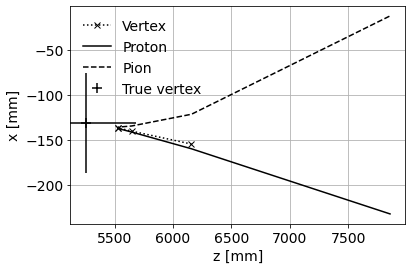

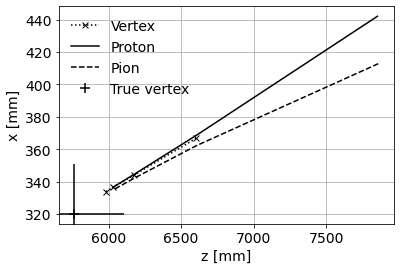

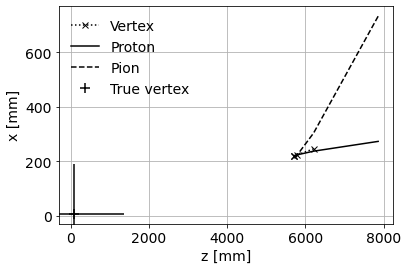

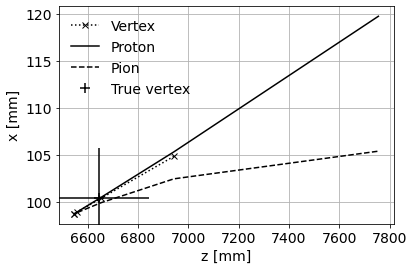

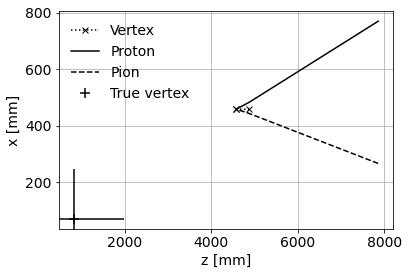

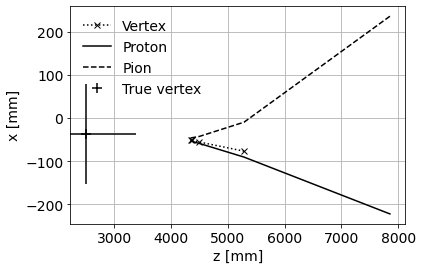

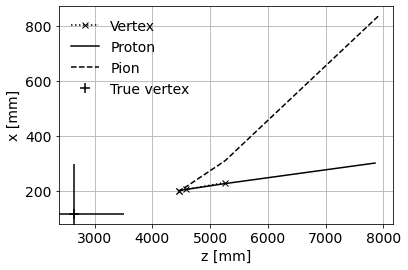

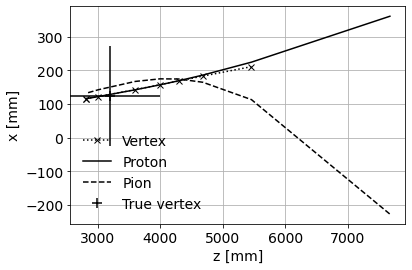

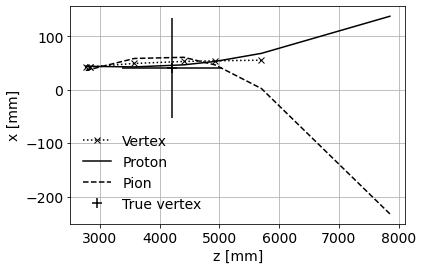

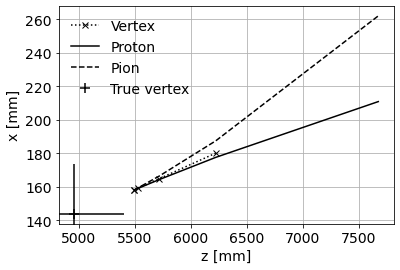

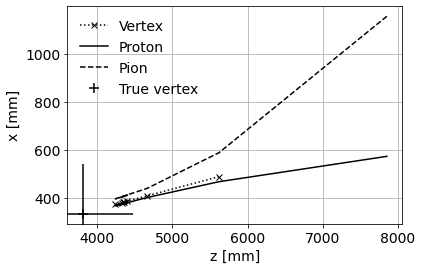

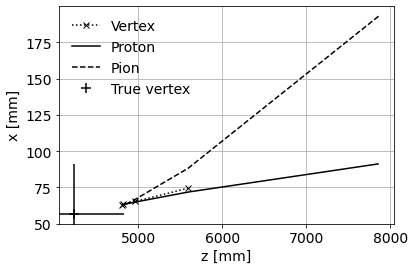

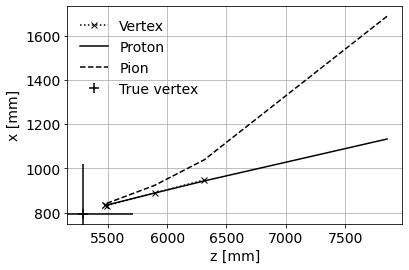

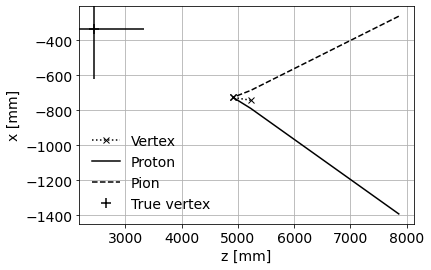

In [15]:
for index in list(df_events.loc[df_events['status'] == 'Converged'].index)[0:20]:
    plot_event_plane(df_events, index, 'z', 'x', tight_axes=True, show_true_vertex=True)

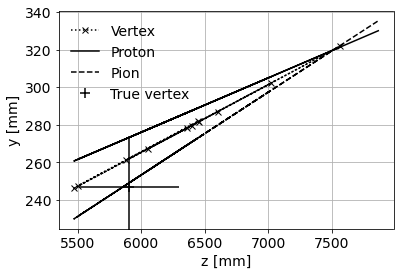

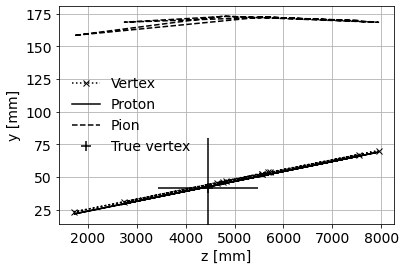

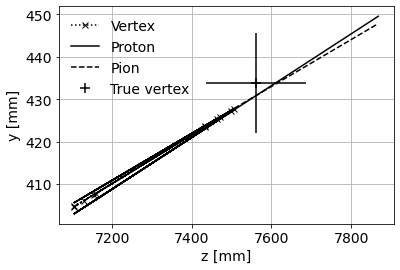

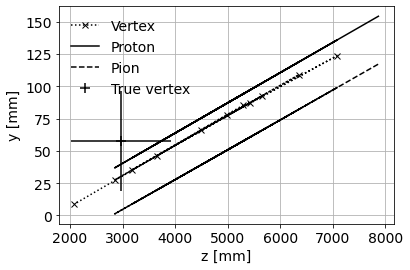

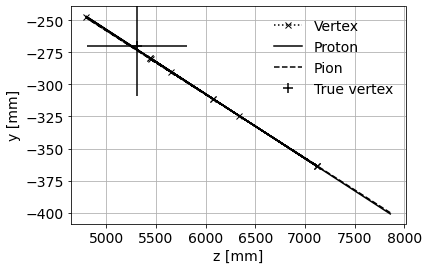

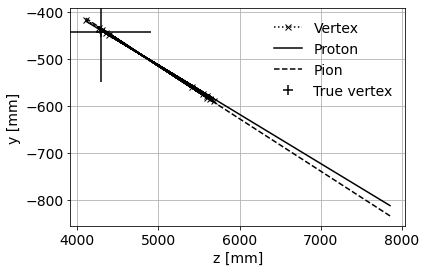

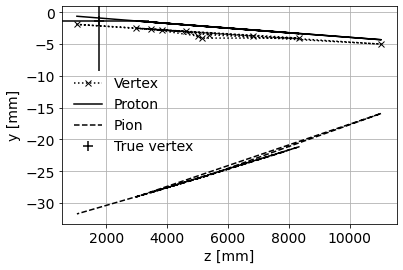

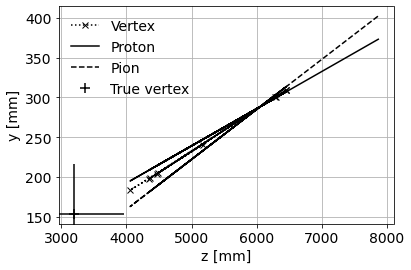

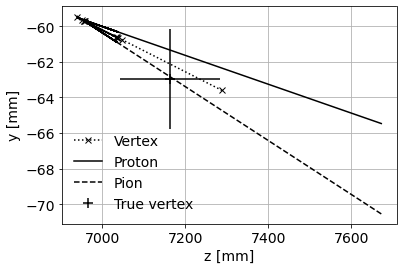

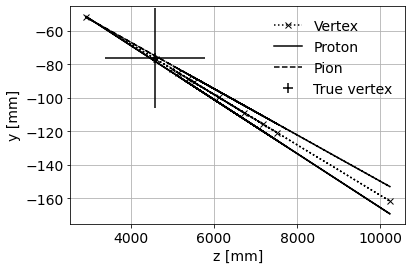

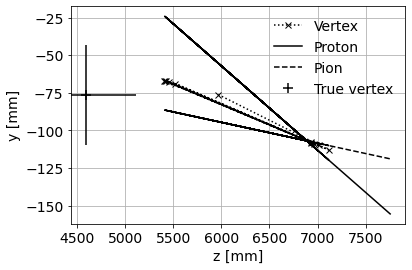

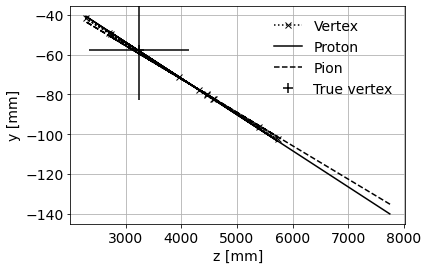

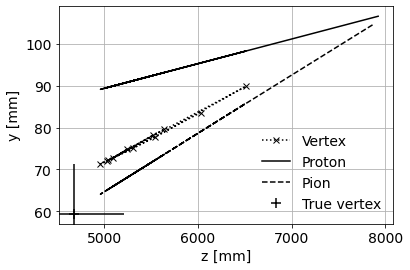

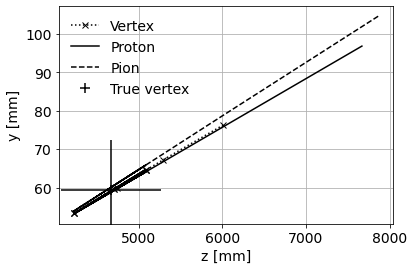

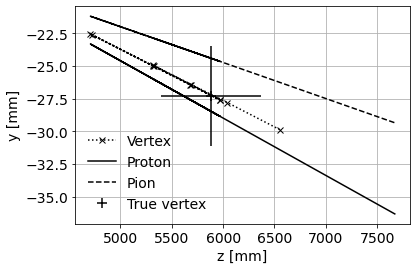

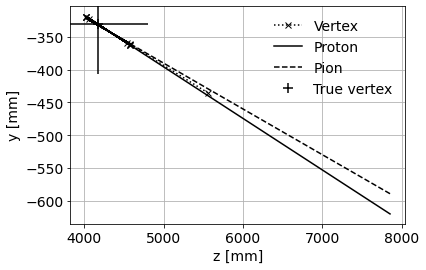

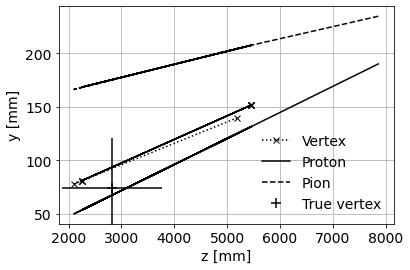

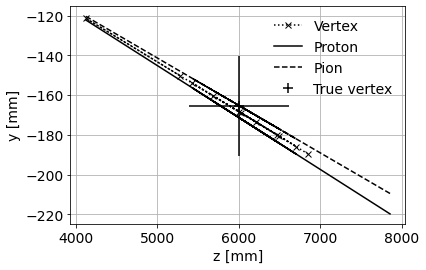

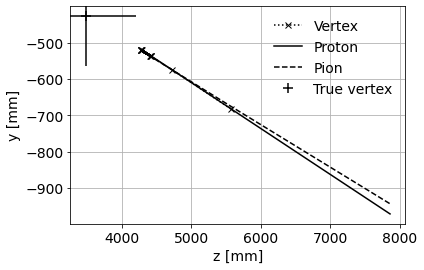

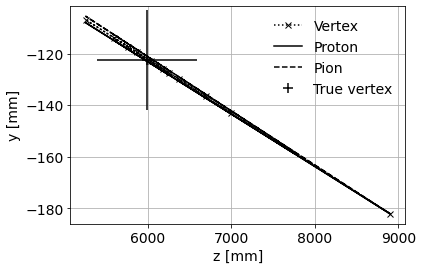

In [16]:
for index in list(df_events.loc[df_events['status'] == 'NonConverged'].index)[20:40]:
    plot_event_plane(df_events, index, 'z', 'y', tight_axes=True, show_true_vertex=True)